<a href="https://colab.research.google.com/github/SilviaVock/IEEE-MMM-2023-Hands-on-tutorial/blob/main/Example_2_linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*adapted from Thomas Nield "Essential Math for Data Science", O'Reilly, 2022*

# Linear regression



---



#PART 1: Solving linear regression using SymPy



---



# Task
Find the best fit line for given datapoints (x,y), i.e. adjust m (weight) and b (bias).


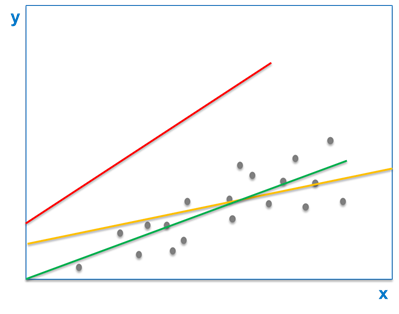

# Start: Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sympy import*


# Import data

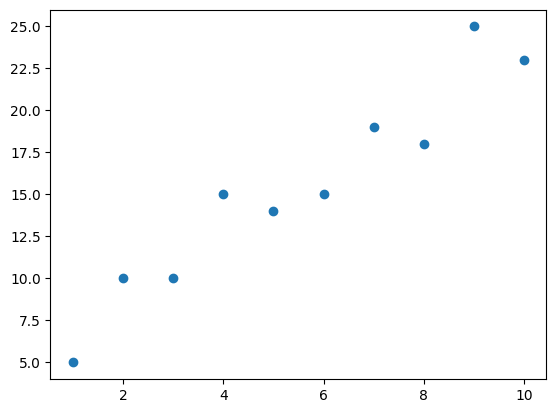

In [2]:
# Read a CSV file from a URL and store it in a DataFrame called 'data'
# The URL "https://bit.ly/2KF29Bd" is used as the data source
data  = pd.read_csv("https://bit.ly/2KF29Bd")

# Extract the values from all rows (':' stands for all rows) and the first column (index 0) of the DataFrame 'data' and store it in 'input_x'
input_x = data.iloc[:,0].values
# Extract the values from all rows (':' stands for all rows) and the second column (index 1) of the DataFrame 'data' and store it in 'input_y'
input_y = data.iloc[:,1].values

plt.scatter(input_x, input_y)

In [3]:
print(data)

    x   y
0   1   5
1   2  10
2   3  10
3   4  15
4   5  14
5   6  15
6   7  19
7   8  18
8   9  25
9  10  23


#Define Loss function


Task: Find best fitting line!


How? Minimize the sum of squarers

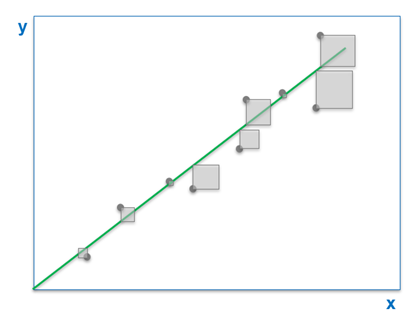

The loss or objective function


$f(x_i):$ predicted values

$y(x_i):$ target value

$\mathcal{L} = \sum^{n}_{i=0} (f(x_i)-y (x_i))^2=  \sum^{n}_{i=0} ((mx_i + b)-y_i)^2$



# Minimizing the loss

A couple of search algorithms could be used to find the right set of values to solve the given problem (see $\text{Nield, 2022}$):
*   brute force approach: generating random m, b values and choosing the one with the smallest loss $\mathcal{L}$: unreasonably time-consuming
* closed form expression: does not scale for larger input values
* matrix decomposition: methods used by many scientific libraries for linear regression, because it copes with large amount of data
* **gradient descent**: an optimization technique that uses derivatives and iterations to minimize a set of parameters against an objective (here: the loss function)  



#Gradient descent

We want to find a minimum of the loss function.

How? By calculating derivatives.

#Calculate partial derivatives with symbolic math

In [16]:
# Define symbolic variables
m,b,i,n = symbols('m b i n')
# Define symbolic functions on which you can perform operations like differentiation and integration
x,y = symbols('x y',cls=Function)

In [17]:
# Define symbolic expression for the sum of squares with the parameters m and b
sum_of_squares = Sum((m*x(i) + b - y(i))**2, (i,0,n))

In [18]:
points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
# Partial derivatives, with data substituted
d_m = diff(sum_of_squares, m)\
      .subs(n,len(data)-1).doit()\
      .replace(x, lambda i: points[i].x)\
      .replace(y, lambda i: points[i].y)

d_b = diff(sum_of_squares, b)\
      .subs(n,len(data)-1).doit()\
      .replace(x, lambda i: points[i].x)\
      .replace(y, lambda i: points[i].y)

$\frac{\partial}{\partial m} \mathcal{L} = \sum^{n}_{i=0} 2(b+mx_i-y_i)x_i$

\
$\frac{\partial}{\partial b} \mathcal{L} = \sum^{n}_{i=0} (2b+2mx_i-2y_i)$

In [19]:
# Compile using lambdify for faster computation
# The lambdify function from the SymPy library converts a symbolic expression (here: d_b and d_m) involving symbolic variables (here: m and b) into a callable Python function

d_m = lambdify([m,b], d_m)
d_b = lambdify([m,b], d_b)

# 4.2 Gradient descent and learning rate

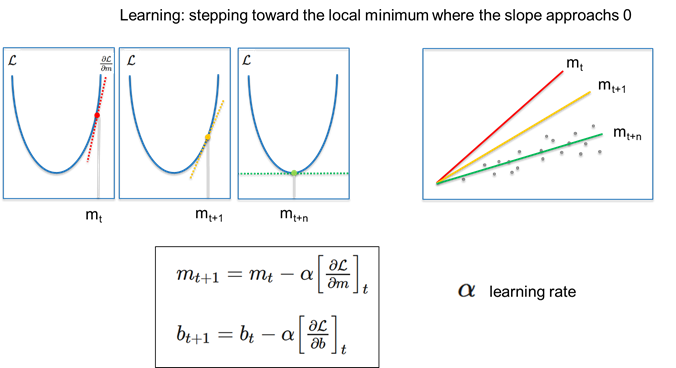

In [20]:
# Initialize
m = 10.0
b = 5.0

In [21]:
# Define Learning rate
L = .001

In [22]:
# Define number of iterations
iterations = 1000

In [23]:
# Perform Gradient Descent

for i in range (iterations):
  # update m and b
  m -= d_m(m,b) * L
  b -= d_b(m,b) * L

Result:Linear model

In [47]:
print("y = {0}x + {1}".format(m,b))

y = 1.9486841441608178x + 4.668662155579504


# Stochastic Gradient Descent


In [24]:
#initialize
m=0.0
b=0.0

n = data.shape[0]

sample_size = 10 #define sample size
L=.0001
epochs = 1_000_000 #the number of iterations to perform gradient descent

#Performing Stochastic Gradient Descent
for i in range(epochs):
  idx = np.random.choice(n,sample_size, replace=false) #idx is a NumPy-array containing sample from n, its size is defined by sample_size
  x_sample = input_x[idx]
  y_sample = input_y[idx]

  #The current predicted value of Y
  Y_pred = m * x_sample + b

  #d/dm derivative of loss function
  D_m = (-2/sample_size)*sum(x_sample*(y_sample-Y_pred))

  #d/db derivative of loss function
  D_b = (-2/sample_size)*sum((y_sample-Y_pred))

  m = m - L*D_m #update m
  b = b - L*D_b #update m

  #print progress
  if i % 10000 == 0: #if modulus is 0
     print(i,m,b)

print("y = {0}x + {1}".format(m,b))



0 0.02014 0.0030800000000000003
10000 2.351326350720483 1.8655330576314224
20000 2.2100629000368373 2.848984108527301
30000 2.1172427423555242 3.4951815585700228
40000 2.056253281668504 3.919779350256046
50000 2.0161788580970135 4.198770368702054
60000 1.9898471049301987 4.382087356914591
70000 1.9725452659255631 4.502539686722436
80000 1.9611767242623392 4.581685454376728
90000 1.9537067819334497 4.633689865977356
100000 1.9487984972959018 4.667860471760606
110000 1.9455734043805228 4.690312995761098
120000 1.9434542884202846 4.705065904655648
130000 1.942061878163966 4.714759617524954
140000 1.9411469653615177 4.721129077938757
150000 1.9405458024267466 4.725314267505481
160000 1.9401507955220805 4.7280642354103035
170000 1.9398912478259214 4.729871160367257
180000 1.939720706486554 4.731058438878508
190000 1.9396086486688073 4.7318385655007225
200000 1.9395350186940163 4.73235116430625
210000 1.9394866385515455 4.732687978264328
220000 1.9394548493489518 4.732909289046031
230000 1.9

#Plot the loss function


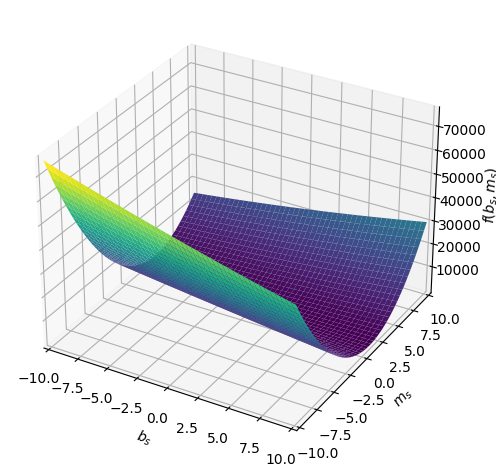

In [ ]:
from sympy import*
from sympy.plotting import plot3d
import pandas as pd

m_s,b_s,i,n = symbols('m_s b_s i n')
x,y  = symbols('x y', cls=Function)

sum_of_squares = Sum((m_s*x(i)+b_s-y(i)) ** 2, (i,0,n))\
    .subs(n, len(data)-1).doit()\
    .replace(x, lambda i:points[i].x)\
    .replace(y, lambda i:points[i].y)

plot3d(sum_of_squares)

# Plot the results

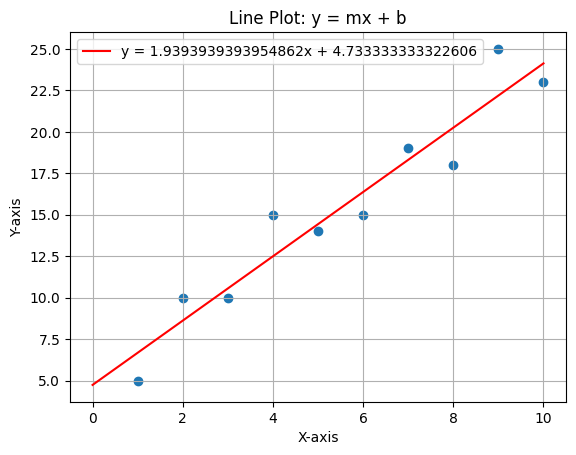

In [25]:

# Generate x values
x_plot = np.linspace(0, 10, 100)  # Adjust the range and number of points as needed

# Calculate corresponding y values
y_plot = m*x_plot + b

# Create a line plot
plt.plot(x_plot, y_plot, label=f'y = {m}x + {b}', color='red')

plt.scatter(input_x, input_y)

# Add labels and a legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Line Plot: y = mx + b')
plt.show()


# Task

1.   Change learning rate and number of iterations and check their impact.
2.   When and why do m and b end up in "nan" ("not a number") in certain cases?



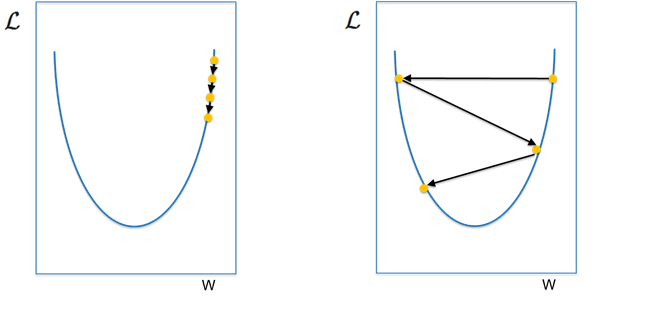



---



# PART 2: Evaluation



---



# Train/Test split + $R^2$



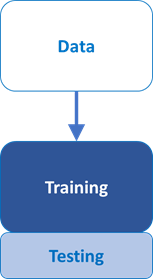

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load some new and larger dataset
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=',')

# Extract input variables (all rows, all columns, but last column)
X = df.values[:,:-1]

# Extract output variables (all rows, last column)
Y = df.values[:,-1]


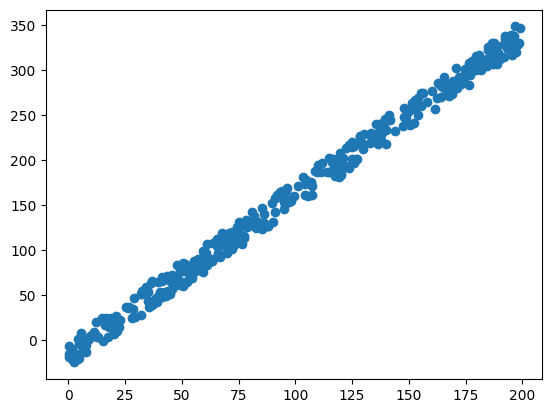

In [57]:
#plot data

plt.scatter(X,Y)

In [58]:
#Seperate training and testing data
#This leaves a third of the data out for testing
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=1/3)

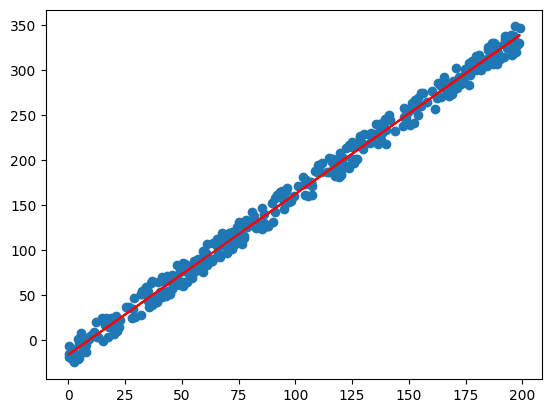

In [60]:
#Perform linear regression
model = LinearRegression()
model.fit(X_train,Y_train)

#plt.scatter(X,Y)

Y_predict = model.predict(X_train)

# Create a line plot
plt.scatter(X,Y)
plt.plot(X_train, Y_predict, color='red')


$r^2 = 1- \frac{\sum\left(y_i-\hat{y_i}\right)^2}{\sum\left(y_i-\overline{y}\right)^2}$

In [61]:
result=model.score(X_test, Y_test)
print("r^2:%.3f"% result)

r^2:0.992


# 3-fold-cross validation


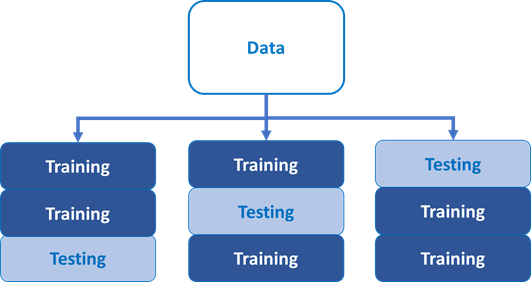

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# Load some new and larger dataset
df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=',')

# Extract input variables (all rows, all columns, but last column)
X = df.values[:,:-1]

# Extract output variables (all rows, last column)
Y = df.values[:,-1]


In [ ]:
#Perform linear regression
#K-Folds cross-validator: Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
#Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X,Y, cv=kfold)
print(results)
print("MSE:mean=%.3f (stdev-%.10f)"%(results.mean(), results.std()))


[0.99337354 0.99345032 0.99251425]
MSE:mean=0.993 (stdev-0.0004243304)
